In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
dataset = r"C:\Users\FUNMILOLA\Downloads\1746182953975_72e91ae472.csv"
df = pd.read_csv(dataset)
print(df)

          Country  Year  Total Smokers (Millions)  Smoking Prevalence (%)  \
0    South Africa  2010                     279.6                    21.5   
1    South Africa  2022                      41.8                    10.2   
2    South Africa  2017                     262.0                    30.7   
3         Germany  2016                      11.3                    38.2   
4          Brazil  2014                     241.9                    27.6   
..            ...   ...                       ...                     ...   
145       Germany  2024                      85.4                    36.9   
146            UK  2016                     186.1                    19.3   
147       Vietnam  2011                     138.5                    22.4   
148        Brazil  2014                     195.2                    38.8   
149         India  2022                     344.1                    35.9   

     Male Smokers (%)  Female Smokers (%)  \
0                13.3         

In [3]:
# Display the first five rows of the DataFrame
df.head()

,Country,Year,Total Smokers (Millions),Smoking Prevalence (%),Male Smokers (%),Female Smokers (%),Cigarette Consumption (Billion Units),Top Cigarette Brand in Country,Brand Market Share (%),Smoking-Related Deaths,Tobacco Tax Rate (%),Smoking Ban Policy
0,South Africa,2010,279.6,21.5,13.3,8.2,2415.7,Peter Stuyvesant,21.3,461574,32.9,Partial
1,South Africa,2022,41.8,10.2,7.5,2.7,97.0,Peter Stuyvesant,46.6,57945,42.9,Comprehensive
2,South Africa,2017,262.0,30.7,22.1,8.6,161.5,Peter Stuyvesant,58.5,407834,51.4,Partial
3,Germany,2016,11.3,38.2,24.1,14.1,111.5,Marlboro,15.9,13142,79.6,Partial
4,Brazil,2014,241.9,27.6,18.2,9.4,2151.2,Derby,59.9,220450,56.4,NaN


In [4]:
# Display the last five rows of the DataFrame
df.tail()

,Country,Year,Total Smokers (Millions),Smoking Prevalence (%),Male Smokers (%),Female Smokers (%),Cigarette Consumption (Billion Units),Top Cigarette Brand in Country,Brand Market Share (%),Smoking-Related Deaths,Tobacco Tax Rate (%),Smoking Ban Policy
145,Germany,2024,85.4,36.9,31.9,5.0,737.7,Marlboro,22.1,160190,61.1,Comprehensive
146,UK,2016,186.1,19.3,12.2,7.1,509.8,Marlboro,45.5,258378,33.3,NaN
147,Vietnam,2011,138.5,22.4,15.7,6.7,989.9,Vinataba,59.3,191345,66.7,Comprehensive
148,Brazil,2014,195.2,38.8,33.8,5.0,1358.5,Derby,31.5,372393,66.9,NaN
149,India,2022,344.1,35.9,25.4,10.5,2011.5,Gold Flake,34.8,606058,47.2,Partial


In [5]:
# Display the number of rows and columns in the DataFrame
shape = df.shape
print(f'The number of rows and columns in the DataFrame is {shape}.')

The number of rows and columns in the DataFrame is (150, 12).


In [6]:
# Display the columns in the DataFrame
columns = df.columns
print(f'The following are the columns in the DataFrame: {columns}')

The following are the columns in the DataFrame: Index(['Country', 'Year', 'Total Smokers (Millions)', 'Smoking Prevalence (%)',
       'Male Smokers (%)', 'Female Smokers (%)',
       'Cigarette Consumption (Billion Units)',
       'Top Cigarette Brand in Country', 'Brand Market Share (%)',
       'Smoking-Related Deaths', 'Tobacco Tax Rate (%)', 'Smoking Ban Policy'],
      dtype='object')


In [7]:
# Display the information in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                150 non-null    object 
 1   Year                                   150 non-null    int64  
 2   Total Smokers (Millions)               150 non-null    float64
 3   Smoking Prevalence (%)                 150 non-null    float64
 4   Male Smokers (%)                       150 non-null    float64
 5   Female Smokers (%)                     150 non-null    float64
 6   Cigarette Consumption (Billion Units)  150 non-null    float64
 7   Top Cigarette Brand in Country         150 non-null    object 
 8   Brand Market Share (%)                 150 non-null    float64
 9   Smoking-Related Deaths                 150 non-null    int64  
 10  Tobacco Tax Rate (%)                   150 non-null    float64
 11  Smokin

In [8]:
# Clean column names
def transform_column(dataset):
    data = dataset.copy()
    data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()
    return data

df = transform_column(df)
df.columns

Index(['country', 'year', 'total_smokers_(millions)', 'smoking_prevalence_(%)',
       'male_smokers_(%)', 'female_smokers_(%)',
       'cigarette_consumption_(billion_units)',
       'top_cigarette_brand_in_country', 'brand_market_share_(%)',
       'smoking-related_deaths', 'tobacco_tax_rate_(%)', 'smoking_ban_policy'],
      dtype='object')

In [9]:
# Checking the datatypes in the DataFrame
data_types = df.dtypes
print(data_types)

country                                   object
year                                       int64
total_smokers_(millions)                 float64
smoking_prevalence_(%)                   float64
male_smokers_(%)                         float64
female_smokers_(%)                       float64
cigarette_consumption_(billion_units)    float64
top_cigarette_brand_in_country            object
brand_market_share_(%)                   float64
smoking-related_deaths                     int64
tobacco_tax_rate_(%)                     float64
smoking_ban_policy                        object
dtype: object


In [10]:
# Checking for the number of unique values in each column
unique_values = df.nunique()
print(unique_values)

country                                   20
year                                      15
total_smokers_(millions)                 145
smoking_prevalence_(%)                   116
male_smokers_(%)                         114
female_smokers_(%)                        76
cigarette_consumption_(billion_units)    147
top_cigarette_brand_in_country            17
brand_market_share_(%)                   130
smoking-related_deaths                   150
tobacco_tax_rate_(%)                     135
smoking_ban_policy                         2
dtype: int64


In [11]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

country                                   0
year                                      0
total_smokers_(millions)                  0
smoking_prevalence_(%)                    0
male_smokers_(%)                          0
female_smokers_(%)                        0
cigarette_consumption_(billion_units)     0
top_cigarette_brand_in_country            0
brand_market_share_(%)                    0
smoking-related_deaths                    0
tobacco_tax_rate_(%)                      0
smoking_ban_policy                       48
dtype: int64


In [12]:
# Display the range of year from the dataset
year_range = f"{df['year'].min()} - {df['year'].max()}"
print(year_range)

2010 - 2024


In [13]:
# Display the unique countries in the dataset
unique_country = df['country'].unique()
print(unique_country)

['South Africa' 'Germany' 'Brazil' 'South Korea' 'UK' 'Canada' 'Vietnam'
 'Italy' 'India' 'China' 'Mexico' 'Spain' 'Russia' 'Thailand' 'Australia'
 'Turkey' 'Japan' 'Indonesia' 'USA' 'France']


In [14]:
# Count the number of times each country appears
country_counts = df['country'].value_counts()
print(country_counts)

country
South Africa    11
China           11
India           10
Brazil           9
South Korea      9
UK               9
Italy            9
Turkey           9
Indonesia        9
Australia        8
Vietnam          7
Spain            7
Russia           7
Canada           6
USA              6
Germany          5
Thailand         5
Japan            5
Mexico           4
France           4
Name: count, dtype: int64


In [15]:
# Count the number of top cigarette brands
top_brands = df['top_cigarette_brand_in_country'].value_counts()
print(top_brands)

top_cigarette_brand_in_country
Marlboro                        24
Peter Stuyvesant                11
China National Tobacco Corp.    11
Gold Flake                      10
Esse                             9
MS                               9
Derby                            9
Tekel                            9
Gudang Garam                     9
Winfield                         8
Vinataba                         7
Fortuna                          7
Sobranie                         7
Du Maurier                       6
Wonder                           5
Mevius                           5
Gauloises                        4
Name: count, dtype: int64


In [16]:
# Calculating the basic descriptive statistics
basic_stats = df.describe().T
basic_stats

,count,mean,std,min,25%,50%,75%,max
year,150.0,2018.066667,4.389840,2010.0,2014.000,2018.00,2022.000,2024.0
total_smokers_(millions),150.0,170.466000,100.806168,2.7,86.225,165.00,256.625,344.1
smoking_prevalence_(%),150.0,23.387333,9.697494,5.9,15.600,22.80,31.000,39.9
male_smokers_(%),150.0,17.719333,8.204800,3.8,11.725,16.90,23.725,34.2
female_smokers_(%),150.0,5.668000,2.844335,0.9,3.400,5.00,7.500,15.2
cigarette_consumption_(billion_units),150.0,927.815333,773.890041,4.3,290.850,753.05,1358.475,3238.6
brand_market_share_(%),150.0,33.956667,14.643969,10.1,20.550,33.30,45.775,59.9
smoking-related_deaths,150.0,224419.926667,160056.395740,4452.0,84614.750,190765.50,349719.000,606058.0
tobacco_tax_rate_(%),150.0,57.835333,17.996011,30.1,42.350,55.25,75.000,89.8


In [17]:
# Correlation matrix for numerical columns
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,year,total_smokers_(millions),smoking_prevalence_(%),male_smokers_(%),female_smokers_(%),cigarette_consumption_(billion_units),brand_market_share_(%),smoking-related_deaths,tobacco_tax_rate_(%)
year,1.000000,0.053610,-0.073668,-0.063502,-0.067984,-0.048527,-0.029782,0.071164,0.095961
total_smokers_(millions),0.053610,1.000000,0.162450,0.156675,0.101913,0.722052,0.061663,0.864924,-0.011976
smoking_prevalence_(%),-0.073668,0.162450,1.000000,0.963162,0.631058,0.147674,0.064669,0.177675,0.002055
male_smokers_(%),-0.063502,0.156675,0.963162,1.000000,0.399199,0.156495,0.060002,0.181275,0.008722
female_smokers_(%),-0.067984,0.101913,0.631058,0.399199,1.000000,0.052052,0.047400,0.082858,-0.018150
cigarette_consumption_(billion_units),-0.048527,0.722052,0.147674,0.156495,0.052052,1.000000,0.110250,0.661483,-0.087167
brand_market_share_(%),-0.029782,0.061663,0.064669,0.060002,0.047400,0.110250,1.000000,0.009285,-0.027925
smoking-related_deaths,0.071164,0.864924,0.177675,0.181275,0.082858,0.661483,0.009285,1.000000,-0.079436
tobacco_tax_rate_(%),0.095961,-0.011976,0.002055,0.008722,-0.018150,-0.087167,-0.027925,-0.079436,1.000000


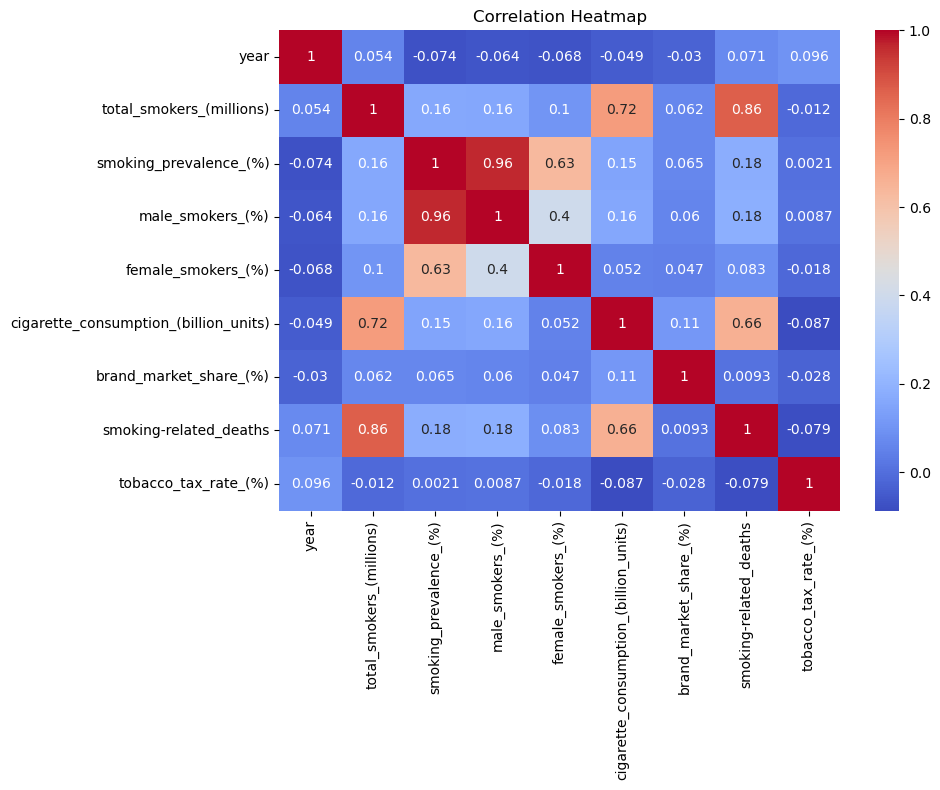

In [18]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

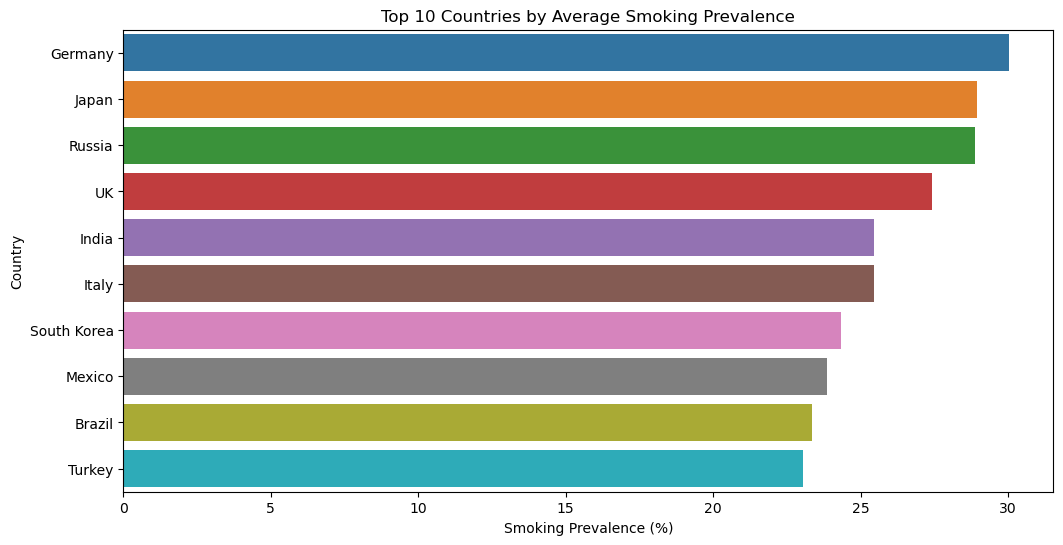

In [19]:
# Smoking Prevalence by Country
plt.figure(figsize=(12, 6))
top_countries = df.groupby('country')['smoking_prevalence_(%)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Average Smoking Prevalence")
plt.xlabel("Smoking Prevalence (%)")
plt.ylabel("Country")
plt.show()

Trends by age group could not be analyzed because the dataset does not include an age-related column. To explore this further, we need to add another dataset or a column with age-related information to support a more detailed analysis.

In [21]:
# Calculate the global average smoking prevalence by male
avg_male = df['male_smokers_(%)'].mean()
avg_male

17.71933333333334

In [22]:
# Calculate the global average smoking prevalence by female
avg_female = df['female_smokers_(%)'].mean()
avg_female

5.668

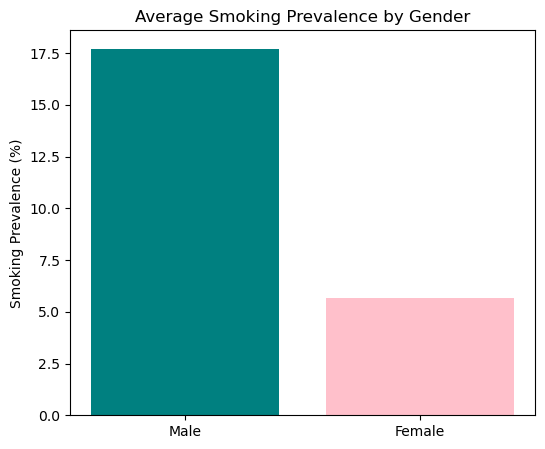

In [23]:
# Plot Smoking Prevalence by gender
plt.figure(figsize=(6, 5))
plt.bar(['Male', 'Female'], [avg_male, avg_female], color=['teal', 'pink'])
plt.title('Average Smoking Prevalence by Gender')
plt.ylabel('Smoking Prevalence (%)')
plt.show()

In [24]:
# Trend of smoking rate over the years
yearly_trend = df.groupby('year')['smoking_prevalence_(%)'].mean()
yearly_trend

year
2010    28.483333
2011    24.300000
2012    22.945455
2013    21.860000
2014    25.100000
2015    21.757143
2016    18.860000
2017    25.923077
2018    23.391667
2019    27.150000
2020    24.038462
2021    22.900000
2022    20.731250
2023    19.814286
2024    25.411765
Name: smoking_prevalence_(%), dtype: float64

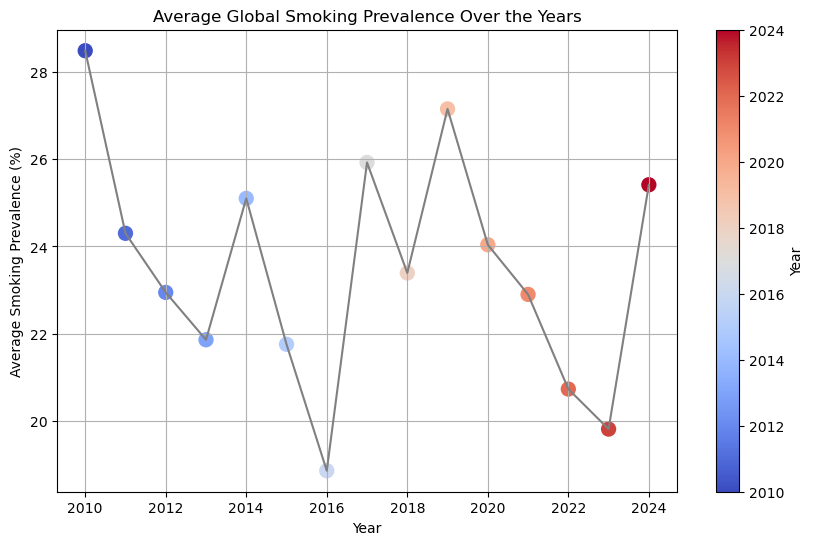

In [25]:
# Plot the trend of smoking rate over the years
plt.figure(figsize=(10, 6))
scatter = plt.scatter(yearly_trend.index, yearly_trend.values, c=yearly_trend.index, cmap='coolwarm', s=100)
plt.plot(yearly_trend.index, yearly_trend.values, color='gray')
plt.colorbar(scatter, label='Year')
plt.title("Average Global Smoking Prevalence Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Smoking Prevalence (%)")
plt.grid(True)
plt.show()

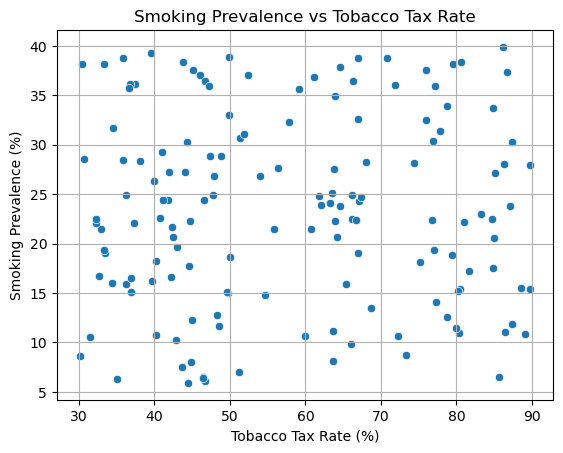

In [26]:
# Impact of Tobacco Tax Rate on Smoking
sns.scatterplot(data=df, x='tobacco_tax_rate_(%)', y='smoking_prevalence_(%)')
plt.title("Smoking Prevalence vs Tobacco Tax Rate")
plt.xlabel("Tobacco Tax Rate (%)")
plt.ylabel("Smoking Prevalence (%)")
plt.grid(True)
plt.show()

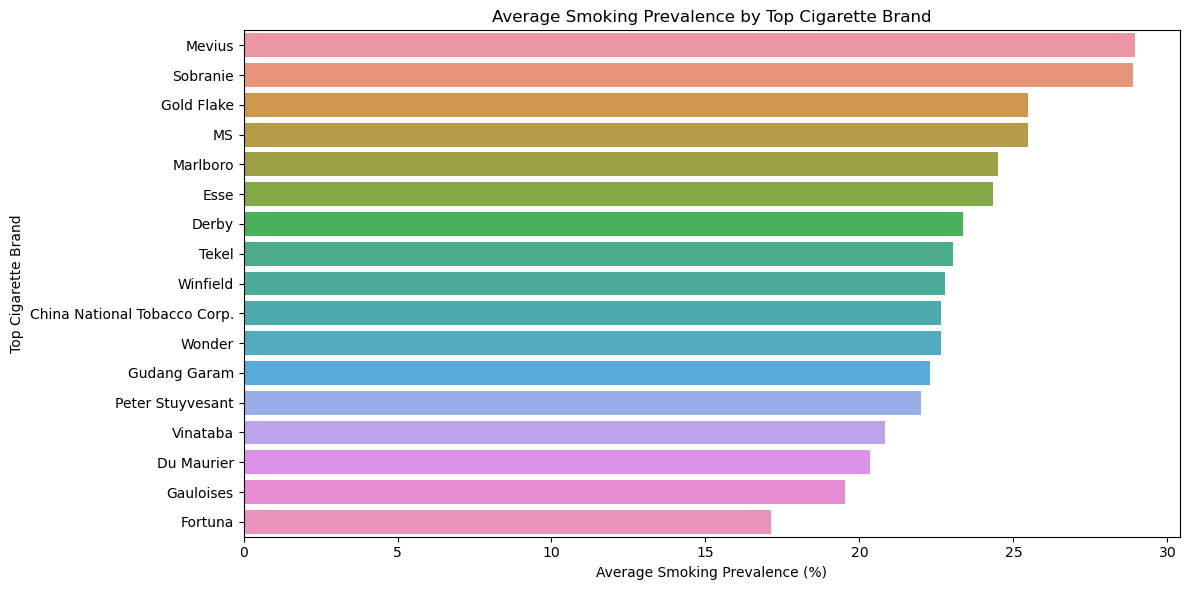

In [27]:
# Average smoking prevalence per brand across countries
brand_smoking = df.groupby('top_cigarette_brand_in_country')['smoking_prevalence_(%)'].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_smoking.values, y=brand_smoking.index)
plt.title("Average Smoking Prevalence by Top Cigarette Brand")
plt.xlabel("Average Smoking Prevalence (%)")
plt.ylabel("Top Cigarette Brand")
plt.tight_layout()
plt.show()

In [28]:
# Correlation between brand market share and smoking prevalence
correlation_value = df[['brand_market_share_(%)', 'smoking_prevalence_(%)']].corr().iloc[0, 1]
correlation_value

0.06466883827796961

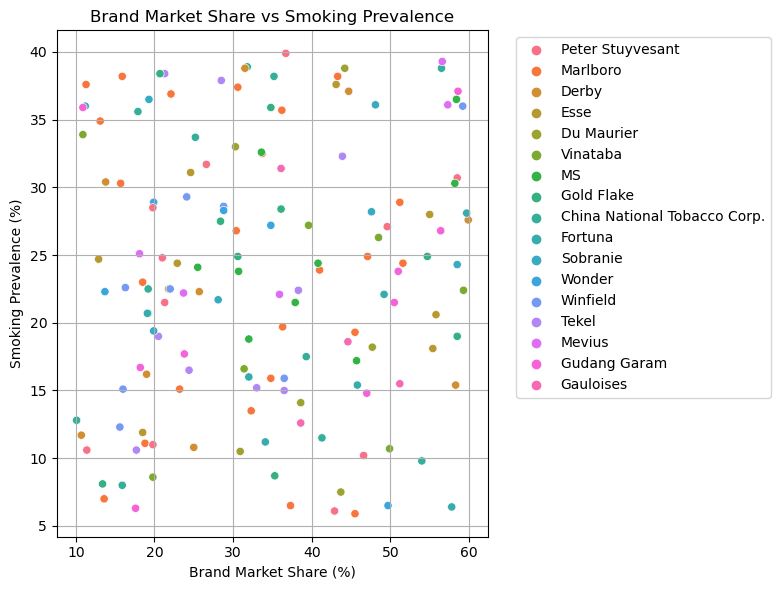

In [29]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='brand_market_share_(%)', y='smoking_prevalence_(%)', hue='top_cigarette_brand_in_country')
plt.title("Brand Market Share vs Smoking Prevalence")
plt.xlabel("Brand Market Share (%)")
plt.ylabel("Smoking Prevalence (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [30]:
# Check available categories in smoking_ban_policy
ban_policy_counts = df['smoking_ban_policy'].value_counts()
ban_policy_counts

smoking_ban_policy
Partial          65
Comprehensive    37
Name: count, dtype: int64

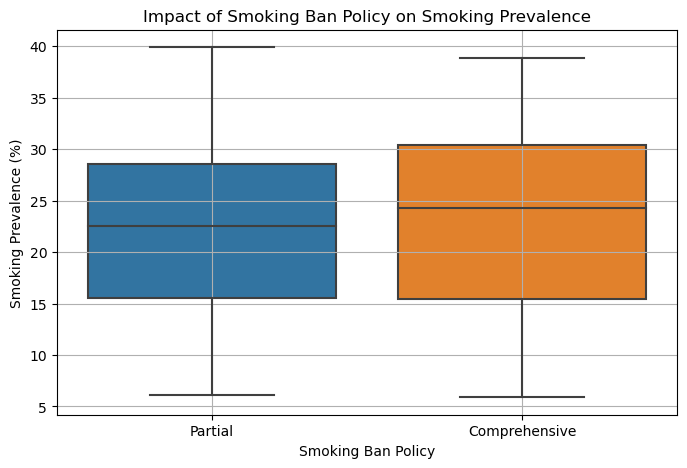

In [31]:
# Smoking prevalence by smoking ban policy
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='smoking_ban_policy', y='smoking_prevalence_(%)')
plt.title('Impact of Smoking Ban Policy on Smoking Prevalence')
plt.xlabel('Smoking Ban Policy')
plt.ylabel('Smoking Prevalence (%)')
plt.grid(True)
plt.show()

In [32]:
# Calculate average smoking rate per policy level
ban_avg = df.groupby('smoking_ban_policy')['smoking_prevalence_(%)'].mean().sort_values(ascending=False)
ban_avg

smoking_ban_policy
Comprehensive    23.037838
Partial          22.924615
Name: smoking_prevalence_(%), dtype: float64

In [33]:
# Most frequent brand per country
top_brands_by_country = df.groupby('country')['top_cigarette_brand_in_country'].agg(lambda x: x.mode()[0])
print(top_brands_by_country.value_counts())

top_cigarette_brand_in_country
Marlboro                        4
Winfield                        1
Mevius                          1
Tekel                           1
Wonder                          1
Fortuna                         1
Esse                            1
Peter Stuyvesant                1
Sobranie                        1
MS                              1
Derby                           1
Gudang Garam                    1
Gold Flake                      1
Gauloises                       1
China National Tobacco Corp.    1
Du Maurier                      1
Vinataba                        1
Name: count, dtype: int64


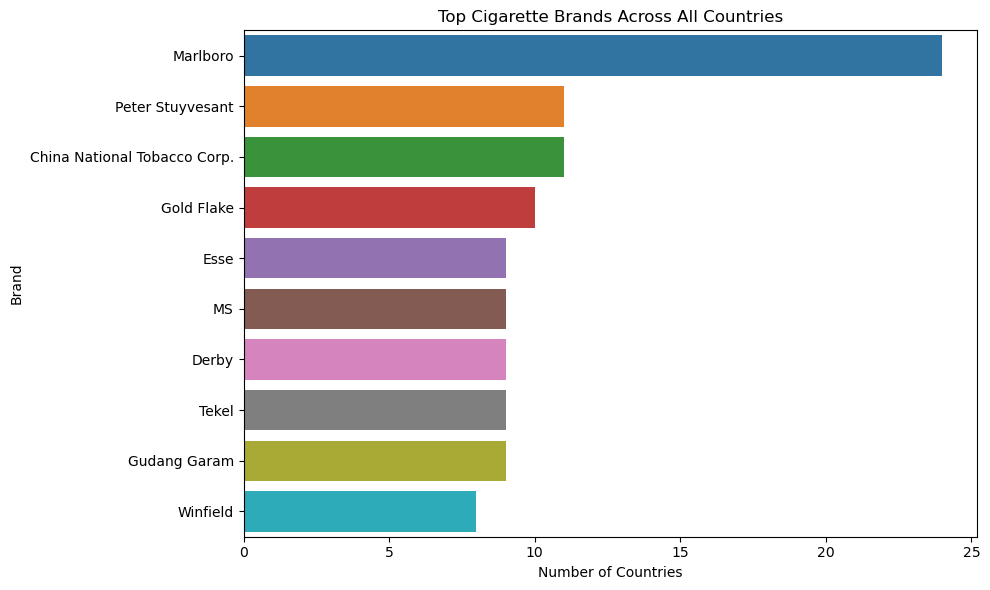

In [34]:
# Top cigarette brands across all countries
plt.figure(figsize=(10, 6))
top_counts = df['top_cigarette_brand_in_country'].value_counts().head(10)
sns.barplot(x=top_counts.values, y=top_counts.index)
plt.title("Top Cigarette Brands Across All Countries")
plt.xlabel("Number of Countries")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [35]:
# Most frequent brand per country
brand_gender_avg = df.groupby('top_cigarette_brand_in_country')[['male_smokers_(%)', 'female_smokers_(%)']].mean()
print(brand_gender_avg.sort_values('male_smokers_(%)', ascending=False))

                                male_smokers_(%)  female_smokers_(%)
top_cigarette_brand_in_country                                      
Mevius                                 22.300000            6.660000
Sobranie                               21.142857            7.742857
Gold Flake                             18.970000            6.500000
Derby                                  18.944444            4.422222
Esse                                   18.533333            5.788889
Marlboro                               18.350000            6.133333
MS                                     18.244444            7.222222
Winfield                               18.162500            4.625000
Tekel                                  17.655556            5.377778
Gudang Garam                           17.555556            4.733333
China National Tobacco Corp.           17.245455            5.400000
Du Maurier                             16.416667            3.933333
Peter Stuyvesant                  

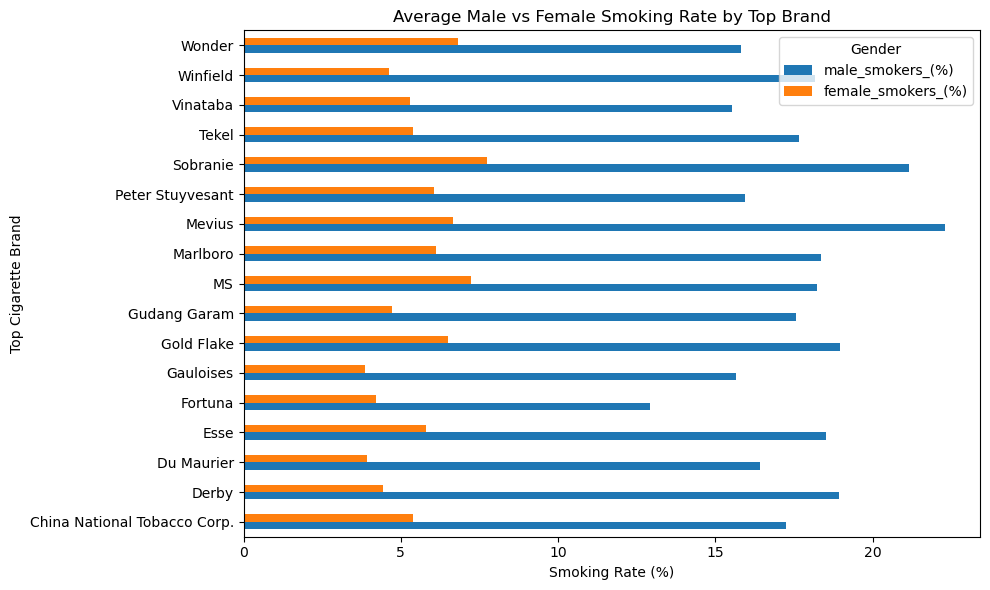

In [36]:
# Average male vs female smoking rate by top brand
brand_gender_avg.plot(kind='barh', figsize=(10, 6))
plt.title("Average Male vs Female Smoking Rate by Top Brand")
plt.xlabel("Smoking Rate (%)")
plt.ylabel("Top Cigarette Brand")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [37]:
# Select features
features = [
    'smoking_prevalence_(%)',
    'male_smokers_(%)',
    'female_smokers_(%)',
    'tobacco_tax_rate_(%)',
    'smoking-related_deaths'
]
cluster_data = df[features].copy()

In [38]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

In [39]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_data['cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\FUNMILOLA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


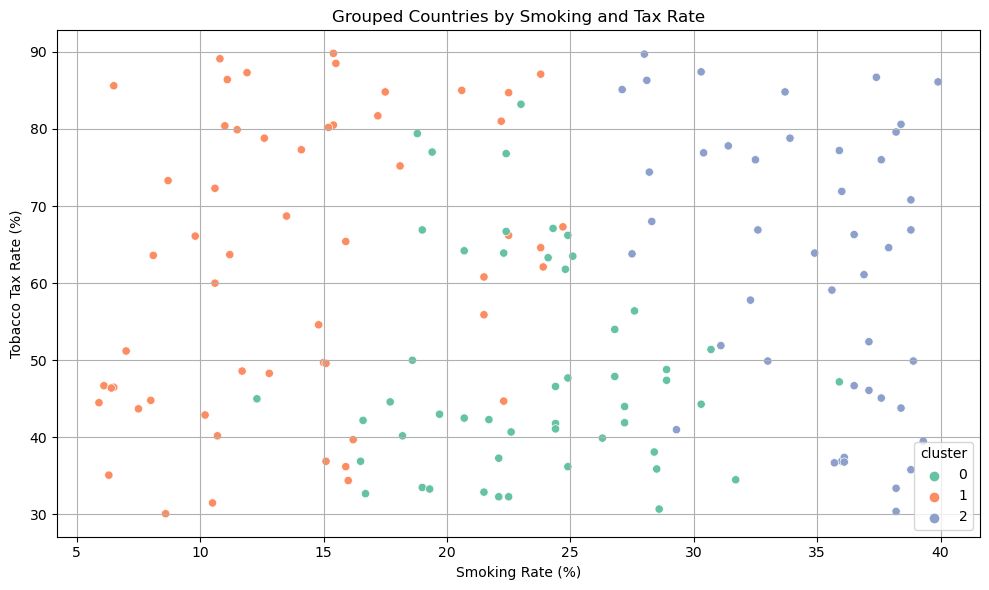

In [40]:
# Grouped countries by smoking and tax rate
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cluster_data,
    x='smoking_prevalence_(%)',
    y='tobacco_tax_rate_(%)',
    hue='cluster',
    palette='Set2'
)
plt.title("Grouped Countries by Smoking and Tax Rate")
plt.xlabel("Smoking Rate (%)")
plt.ylabel("Tobacco Tax Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

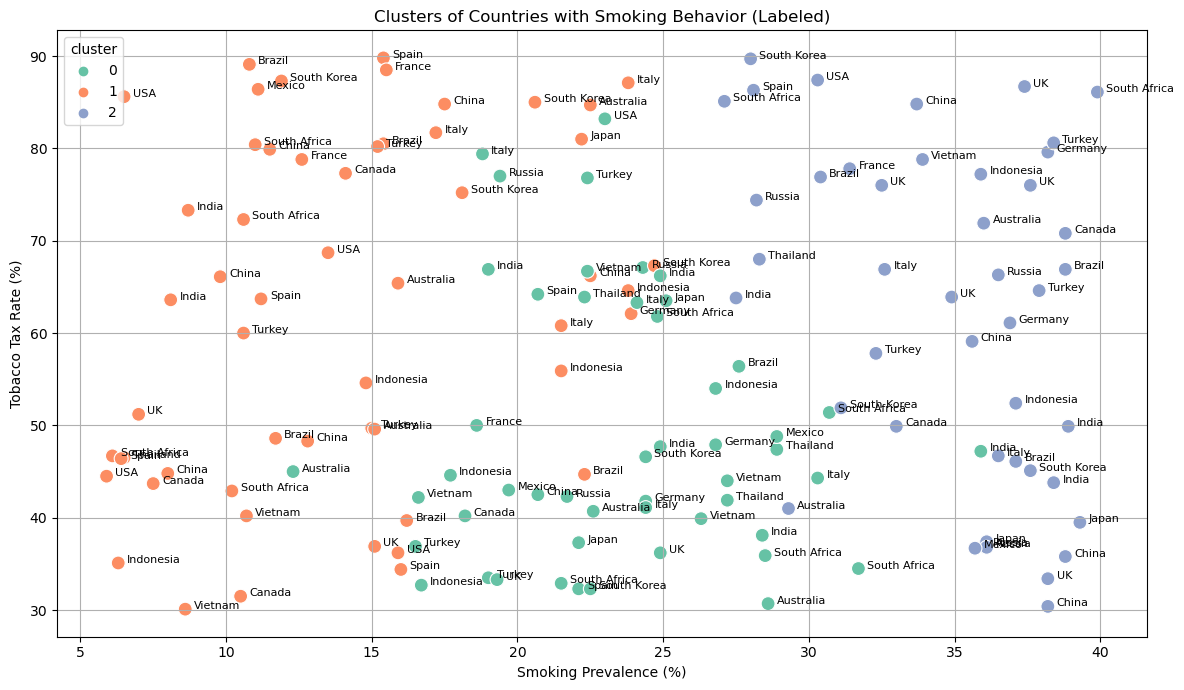

In [41]:
# Clusters of countries with smoking behavior
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=cluster_data,
    x='smoking_prevalence_(%)',
    y='tobacco_tax_rate_(%)',
    hue='cluster',
    palette='Set2',
    s=100
)

for i in cluster_data.index:
    country = df.loc[i, 'country']
    x = cluster_data.loc[i, 'smoking_prevalence_(%)']
    y = cluster_data.loc[i, 'tobacco_tax_rate_(%)']
    plt.text(x + 0.3, y, country, fontsize=8)

plt.title("Clusters of Countries with Smoking Behavior (Labeled)")
plt.xlabel("Smoking Prevalence (%)")
plt.ylabel("Tobacco Tax Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# View average stats per cluster group
cluster_summary = cluster_data.groupby('cluster').mean()
print(cluster_summary)

         smoking_prevalence_(%)  male_smokers_(%)  female_smokers_(%)  \
cluster                                                                 
0                     23.516000            17.098            6.418000   
1                     13.960000            10.380            3.580000   
2                     34.766667            27.380            7.386667   

         tobacco_tax_rate_(%)  smoking-related_deaths  
cluster                                                
0                   48.750000           334318.980000  
1                   62.538182           128748.509091  
2                   62.182222           219241.600000  


C:\Users\FUNMILOLA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


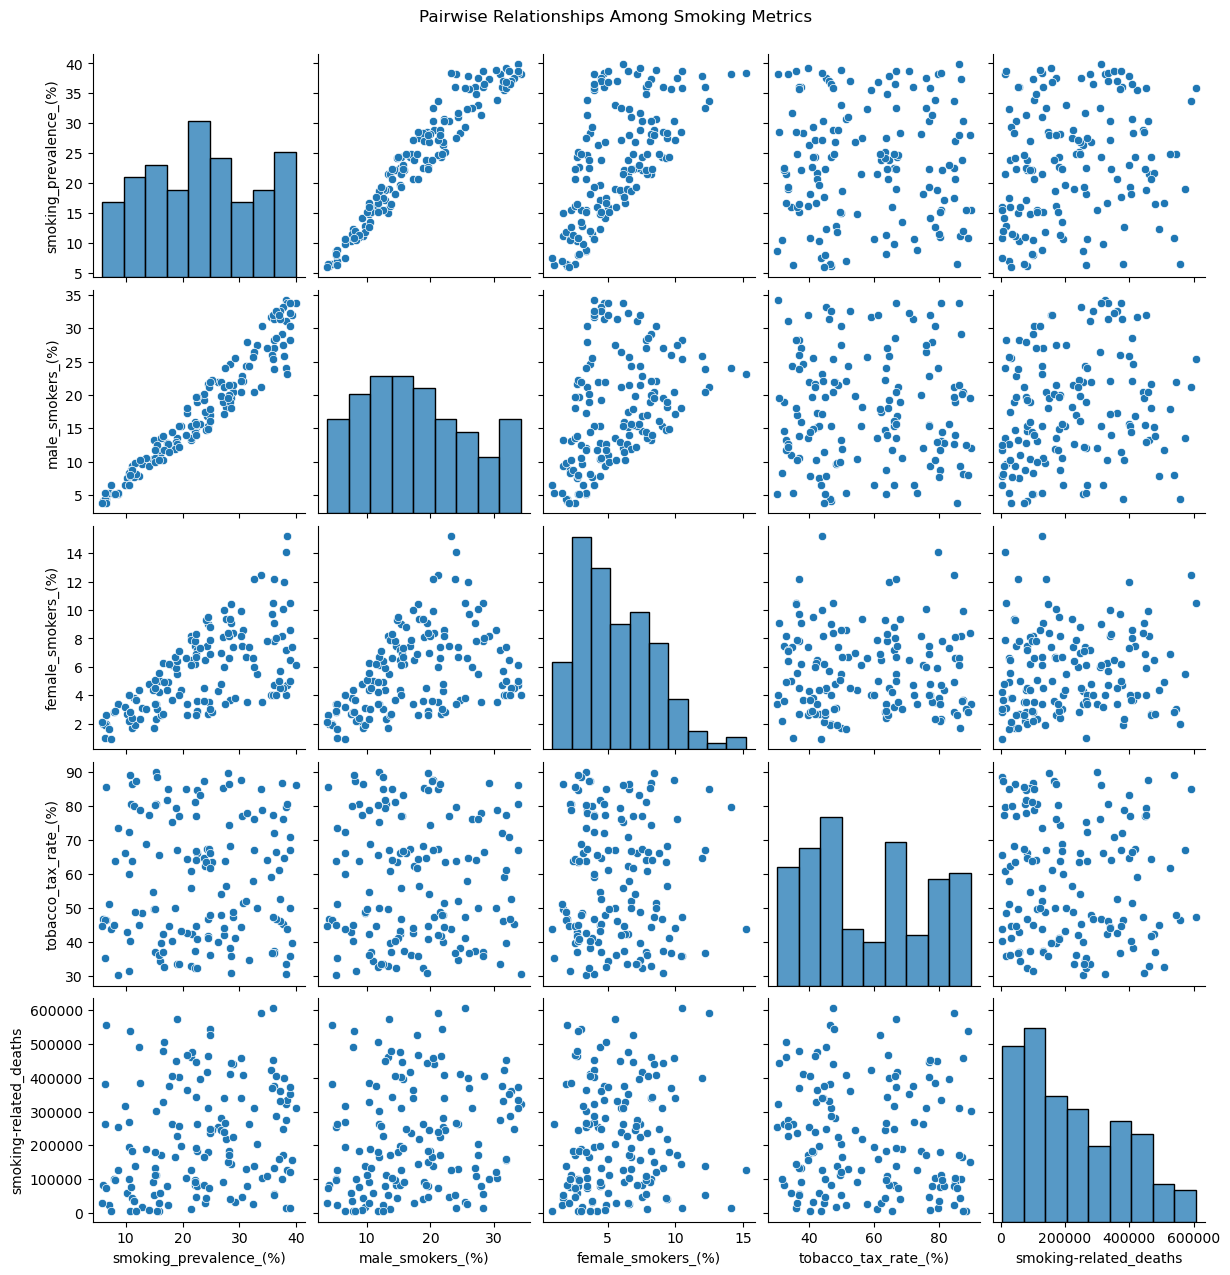

In [43]:
# Pairwise relationships among smoking metrics
sns.pairplot(df[[
    'smoking_prevalence_(%)',
    'male_smokers_(%)',
    'female_smokers_(%)',
    'tobacco_tax_rate_(%)',
    'smoking-related_deaths'
]])
plt.suptitle("Pairwise Relationships Among Smoking Metrics", y=1.02)
plt.show()

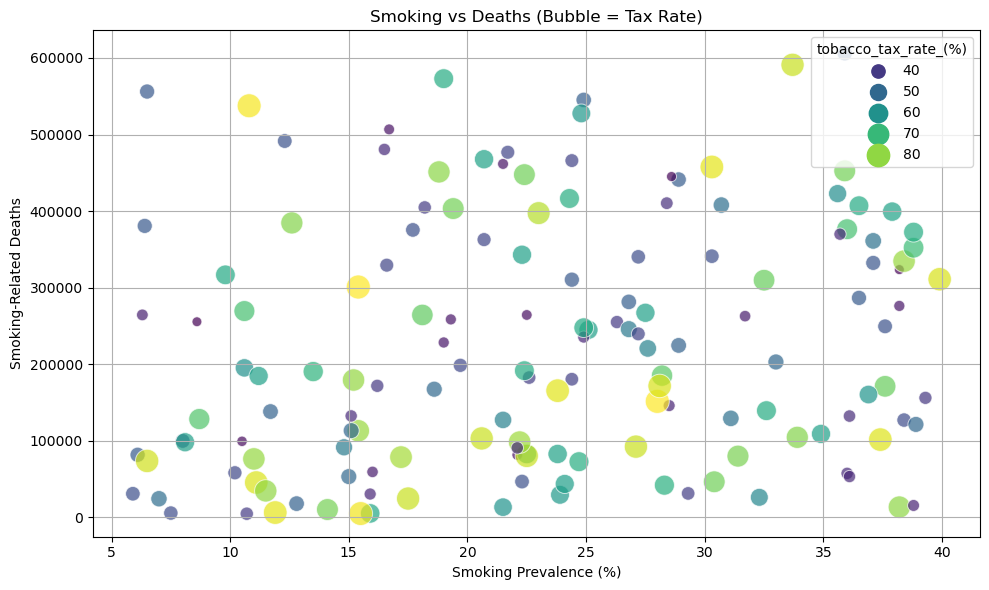

In [44]:
# Smoking vs deaths with tax rate
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='smoking_prevalence_(%)', y='smoking-related_deaths',
    hue='tobacco_tax_rate_(%)', size='tobacco_tax_rate_(%)',
    palette='viridis', alpha=0.7, sizes=(50, 300)
)
plt.title("Smoking vs Deaths (Bubble = Tax Rate)")
plt.xlabel("Smoking Prevalence (%)")
plt.ylabel("Smoking-Related Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()